In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


## Cost function in pure Python

In [9]:
X = np.array([1,2,3])
Y = np.array([1,2,3])

def cost_func(W, X, Y):
    cost = 0
    for tmp_x, tmp_y in zip(X, Y):
        cost += ( W * tmp_x - tmp_y )**2
    return cost/len(X)

for feed_W in np.linspace(-3, 5, 15):
    curr_cost = cost_func(feed_W, X, Y)
    print( f' {feed_W:8.5f}  |  {curr_cost:8.5f}' )

 -3.00000  |  74.66667
 -2.42857  |  54.85714
 -1.85714  |  38.09524
 -1.28571  |  24.38095
 -0.71429  |  13.71429
 -0.14286  |   6.09524
  0.42857  |   1.52381
  1.00000  |   0.00000
  1.57143  |   1.52381
  2.14286  |   6.09524
  2.71429  |  13.71429
  3.28571  |  24.38095
  3.85714  |  38.09524
  4.42857  |  54.85714
  5.00000  |  74.66667


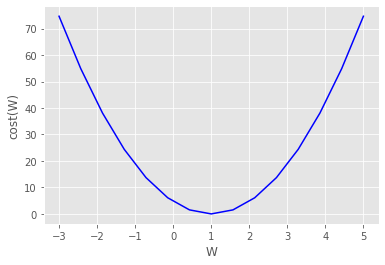

In [10]:
feed_W_arr = np.linspace(-3, 5, 15)

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (6,4)

plt.plot(feed_W_arr, cost_func(feed_W_arr, X, Y), 'b')
plt.xlabel('W')
plt.ylabel('cost(W)')
plt.show()

## Cost function in Tensorflow

In [11]:
X = np.array([1,2,3])
Y = np.array([1,2,3])

def cost_func(W, X, Y):
    hypothesis = W*X
    cost = tf.reduce_mean( tf.square( tf.subtract( hypothesis, Y )))
    return cost

W_values = np.linspace(-3, 5, 15)
cost_values = []

for feed_W in W_values:
    curr_cost = cost_func(feed_W, X, Y)
    cost_values.append(curr_cost)
    print( f' {feed_W:8.5f}  |  {curr_cost:8.5f}' )

 -3.00000  |  74.66667
 -2.42857  |  54.85714
 -1.85714  |  38.09524
 -1.28571  |  24.38095
 -0.71429  |  13.71429
 -0.14286  |   6.09524
  0.42857  |   1.52381
  1.00000  |   0.00000
  1.57143  |   1.52381
  2.14286  |   6.09524
  2.71429  |  13.71429
  3.28571  |  24.38095
  3.85714  |  38.09524
  4.42857  |  54.85714
  5.00000  |  74.66667


## Gradient descent 구현

In [12]:
tf.random.set_seed(0)

x_data = [1 , 2 , 3 , 4]
y_data = [1 , 3 , 5 , 7]

W = tf.Variable(tf.random.normal((1,), -100, 100))

alpha = 0.01
for step in range(300):
    hypothesis = tf.multiply(W, x_data)
    cost = tf.reduce_mean( tf.square( tf.subtract( hypothesis, y_data )))
    
    if step % 30 == 0 :
        print(f'epoch : {step+1:>3}  |  weight : {W.numpy()[0]:7.3f}  |  cost : {cost.numpy():10.3f}')
    
    gradient = tf.reduce_mean( tf.multiply( tf.subtract( hypothesis, y_data ), x_data ) )
    descent = tf.subtract(W, tf.multiply( alpha, gradient ))
    W.assign(descent)
    pass

epoch :   1  |  weight :  51.106  |  cost :  18332.219
epoch :  31  |  weight :   6.435  |  cost :    170.663
epoch :  61  |  weight :   2.126  |  cost :      1.752
epoch :  91  |  weight :   1.711  |  cost :      0.181
epoch : 121  |  weight :   1.671  |  cost :      0.167
epoch : 151  |  weight :   1.667  |  cost :      0.167
epoch : 181  |  weight :   1.667  |  cost :      0.167
epoch : 211  |  weight :   1.667  |  cost :      0.167
epoch : 241  |  weight :   1.667  |  cost :      0.167
epoch : 271  |  weight :   1.667  |  cost :      0.167


In [13]:
tf.random.set_seed(0)

x_data = [1,2,3,4]
y_data = [1,3,5,7]

W = tf.Variable( [5.] )

alpha = 0.01
for step in range(300):
    hypothesis = tf.multiply(W, x_data)
    cost = tf.reduce_mean( tf.square( tf.subtract(hypothesis, y_data)))
    
    if step % 30 == 0:
        print(f'step : {step+1:3}  |  weight : {W.numpy()[0]:7.3f}  |  cost : {cost:10.3f}')
    
    gradient = tf.reduce_mean(tf.multiply(tf.subtract(hypothesis, y_data), x_data))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    pass


step :   1  |  weight :   5.000  |  cost :     83.500
step :  31  |  weight :   1.988  |  cost :      0.942
step :  61  |  weight :   1.698  |  cost :      0.174
step :  91  |  weight :   1.670  |  cost :      0.167
step : 121  |  weight :   1.667  |  cost :      0.167
step : 151  |  weight :   1.667  |  cost :      0.167
step : 181  |  weight :   1.667  |  cost :      0.167
step : 211  |  weight :   1.667  |  cost :      0.167
step : 241  |  weight :   1.667  |  cost :      0.167
step : 271  |  weight :   1.667  |  cost :      0.167


In [14]:
print(tf.multiply(W, 4))
print(tf.multiply(W, 5))

tf.Tensor([6.66667], shape=(1,), dtype=float32)
tf.Tensor([8.333338], shape=(1,), dtype=float32)
